<a href="https://colab.research.google.com/github/dartwinshu/rakamin-digital-festival-data-science/blob/main/Analyze%20the%20Behavior%20of%20Loan%20Property%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Dartwin

# Import Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [134]:
# load dataset loan customer
df = pd.read_csv('loan_customer.csv')
# menampilkan informasi dataset
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
94,LP001322,1991-08-21,6.281376e+11,Male,No,0,Graduate,No,4133.0,0.0,122000,360,30,1.0,NaN,apartment,APPROVE
368,LP002180,1986-11-04,6.281136e+11,Male,No,0,Graduate,Yes,6822.0,0.0,141000,360,30,1.0,NaN,studio,APPROVE
118,LP001405,1983-05-01,6.281356e+10,Male,Yes,1,Graduate,No,2214.0,1398.0,85000,360,30,NaN,yes,house,APPROVE
99,LP001334,1991-03-30,6.285721e+11,Male,Yes,0,Not Graduate,No,4188.0,0.0,115000,180,15,1.0,NaN,apartment,APPROVE
501,LP002587,1984-02-10,6.285729e+10,Male,Yes,0,Not Graduate,No,2600.0,1700.0,107000,360,30,1.0,NaN,studio,APPROVE
87,LP001282,NaN,6.285205e+11,Male,Yes,0,Graduate,No,2500.0,2118.0,104000,360,30,1.0,NaN,apartment,APPROVE
404,LP002287,1991-02-26,6.285647e+11,Female,No,0,Graduate,No,1500.0,1800.0,103000,360,30,0.0,NaN,apartment,REJECT
255,LP001844,1984-07-16,6.281339e+10,Male,No,0,Graduate,Yes,16250.0,0.0,192000,360,30,0.0,NaN,house,REJECT
560,LP002792,1987-02-19,6.281306e+11,Male,Yes,1,Graduate,No,5468.0,1032.0,26000,360,30,1.0,NaN,apartment,APPROVE
156,LP001536,1987-01-23,6.281131e+11,Male,Yes,3+,Graduate,No,39999.0,0.0,600000,180,15,0.0,NaN,apartment,APPROVE


# Data Cleansing

## Handling missing values

In [135]:
# sebelum drop baris dengan missing values
print("Kondisi sebelum drop baris dengan missing values:")
print(df.isna().sum())
# drop baris dengan missing values
df = df.dropna()
# sesudah drop baris dengan missing values
print("Kondisi sesudah drop baris dengan missing values:")
print(df.isna().sum())

Kondisi sebelum drop baris dengan missing values:
loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64
Kondisi sesudah drop baris dengan missing values:
loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64


## Handling duplicated data

In [136]:
# sebelum drop baris dengan duplicated values
print("Jumlah baris sebelum drop baris dengan duplicated values:")
print(df.duplicated().sum())
# drop baris dengan duplicated values
df=df.drop_duplicates()
# sesudah drop baris dengan duplicated values
print("Jumlah baris sesudah drop baris dengan duplicated values:")
print(df.duplicated().sum())

Jumlah baris sebelum drop baris dengan duplicated values:
0
Jumlah baris sesudah drop baris dengan duplicated values:
0


## Handling Outlier

In [110]:
print(f"Jumlah baris sebelum memfilter outlier:")
print(len(df))

for col in ["applicant_income", "coapplicant_income", "loan_amount", "loan_term_month", "loan_term_month"]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f"Jumlah baris setelah memfilter outlier:")
print(len(df))

Jumlah baris sebelum memfilter outlier:
52
Jumlah baris setelah memfilter outlier:
39


## Feature Encoding

In [111]:
# lable encoding untuk kolom gender, married, education, has_credit_card, loan_status
mapping_gender = {
    "Female" : 0,
    "Male" : 1
}

mapping_married = {
    "No" : 0,
    "Yes" : 1
}

mapping_education = {
    "Not Graduate" : 0,
    "Graduate" : 1
}

mapping_has_credit_card = {
    "no" : 0,
    "yes" : 1
}

mapping_loan_status = {
    "REJECT" : 0,
    "APPROVE" : 1
}

df['gender'] = df['gender'].map(mapping_gender)
df['married'] = df['married'].map(mapping_married)
df['education'] = df['education'].map(mapping_education)
df['has_credit_card'] = df['has_credit_card'].map(mapping_has_credit_card)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

# one hot encoding untuk kolom property_type
onehot_property_type = pd.get_dummies(df["property_type"], prefix="property")
df = df.join(onehot_property_type)

# drop kolom outdated
df=df.drop(columns=["property_type"])

# menampilkan hasil encoded
df.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,loan_status,property_apartment,property_house,property_studio
362,LP002160,1990-11-27,6.281153e+11,1,1,3+,1,No,5167.0,3167.0,200000,360,30,1.0,1,1,1,0,0
26,LP001068,1986-09-10,6.281377e+11,1,1,0,1,No,2799.0,2253.0,122000,360,30,1.0,0,1,1,0,0
523,LP002683,1976-11-04,6.285745e+11,1,0,0,1,No,4683.0,1915.0,185000,360,30,1.0,0,0,1,0,0
31,LP001095,1983-09-21,6.281348e+11,1,0,0,1,No,3167.0,0.0,74000,360,30,1.0,1,0,0,1,0
206,LP001692,1991-02-21,6.285272e+11,0,0,0,0,No,4408.0,0.0,120000,360,30,1.0,0,1,1,0,0
81,LP001266,1984-08-05,6.285708e+11,1,1,1,1,Yes,2395.0,0.0,99000,360,30,1.0,0,1,1,0,0
585,LP002892,1983-06-24,6.285638e+11,1,1,2,1,No,6540.0,0.0,205000,360,30,1.0,0,1,1,0,0
93,LP001319,1985-04-18,6.281135e+11,1,1,2,0,No,3273.0,1820.0,81000,360,30,1.0,0,1,0,1,0
257,LP001849,1989-06-13,6.285719e+11,1,0,0,0,No,6045.0,0.0,115000,360,30,0.0,1,0,0,0,1
244,LP001807,1995-10-08,6.285629e+11,1,1,2,1,Yes,6250.0,1300.0,108000,360,30,1.0,0,1,0,0,1


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

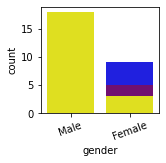

In [188]:
# Buat tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti
# 0 = Female dan 1 = Male
df.groupby(["property_type","gender"])["loan_id"].count().reset_index()

# Buat visualisasi untuk data pada tahap sebelumnya
#Untuk tipe properti = studio
df_groupstudio=df[df["property_type"]=="studio"]

plt.subplot(2, 3, 1)
sns.countplot(df_groupstudio["gender"], color="blue", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk tipe properti = apartemen
df_groupapartment=df[df["property_type"]=="apartment"]

plt.subplot(2, 3, 1)
sns.countplot(df_groupapartment["gender"], color="purple", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk tipe properti = house
df_grouphouse=df[df["property_type"]=="house"]

plt.subplot(2, 3, 1)
sns.countplot(df_grouphouse["gender"], color="yellow", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

# Tulis interpretasi
# - Mayoritas dari nasabah bank yang mengajukan pinjaman membeli properti berjenis kelamin laki-laki
# - Perbandingan antara jenis kelamin nasabah bank yang mengajukan pinjaman membeli properti adalah sekitar 4:1 (Laki-laki:Perempuan)

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

loan_term_year  married
7               Yes         1
15              Yes         4
25              No          1
30              No         18
                Yes        27
40              No          1
Name: loan_id, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

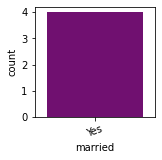

In [172]:
#Buat tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun)
# 0 = tidak menikah dan 1 = menikah
print(df.groupby(["loan_term_year", "married"])["loan_id"].count())

#Buat visualisasi untuk data pada tahap sebelumnya
#Untuk loan term = 7 tahun
df_group7=df[df["loan_term_year"]==7]

plt.subplot(2, 3, 1)
sns.countplot(df_group7["married"], color="blue", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk loan term = 15 tahun
df_group15=df[df["loan_term_year"]==15]

plt.subplot(2, 3, 1)
sns.countplot(df_group15["married"], color="purple", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk loan term = 25 tahun
df_group25=df[df["loan_term_year"]==25]

plt.subplot(2, 3, 1)
sns.countplot(df_group25["married"], color="yellow", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk loan term = 30 tahun
df_group30=df[df["loan_term_year"]==30]

plt.subplot(2, 3, 1)
sns.countplot(df_group30["married"], color="orange", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Tulis interpretasi
#- Pengaruh status pernikahan tidak mempunyai korelasi yang kuat terhadap jangka pinjaman membeli properti
#- Banyaknya nasabah bank yang mengajukan pinjaman membeli properti tertinggi terdapat pada jangka pinjaman 30 tahun